In [42]:
import os
import urllib.request
import datetime
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import sys
import tabula
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go

#Carga de archivos

Se inicia con la carga de los CSV y se hacen correcciones simples y rapidas porque mio no ortografia

In [2]:
siap = pd.read_csv('limpieza\SIAP.csv')
print(siap.head())

    Año  Mes      Cultivo               Estado        Distrito Municipio  \
0  2020    1  Tomate rojo       Aguascalientes  Aguascalientes  Calvillo   
1  2020    1  Tomate rojo      Baja California        Ensenada  Ensenada   
2  2020    1  Tomate rojo  Baja California Sur          Mulegé    Mulegé   
3  2020    1  Tomate rojo  Baja California Sur         Comondú   Comondú   
4  2020    1  Tomate rojo  Baja California Sur          La Paz    La Paz   

   Superficie(ha)_Sembrada  Superficie(ha)_Cosechada  \
0                     16.0                       6.0   
1                     19.5                       0.0   
2                     80.0                       0.0   
3                    127.0                       0.0   
4                    611.0                     106.0   

   Superficie(ha)_Siniestrada  Producción  Rendimiento(udm/ha)  
0                         0.0       90.00                15.00  
1                         0.0        0.00                 0.00  
2          

In [3]:
siap["Cultivo"].unique()

array(['Tomate rojo', 'Chile verde', 'Limón', 'Plátano', 'Mango',
       'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Lechuga', 'Nopal',
       'Nuez', 'Fresa', 'Toronja', 'Piña', 'Berenjena', 'Uva', 'Naranja',
       'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno', 'Espárrago',
       'Zarzamora', 'Coliflor', 'Guayaba', 'Tomate verde', 'Frijol',
       'Garbanzo grano', 'Frambuesa', 'Pepino', 'Calabacita'],
      dtype=object)

In [4]:
import pandas as pd

# Suponiendo que el DataFrame se llama df y la columna es 'Estado'
siap['Estado'] = siap['Estado'].apply(lambda x: x.title())


In [5]:
siap["Estado"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Colima', 'Chiapas', 'Guanajuato', 'Guerrero',
       'Jalisco', 'Estado De México', 'Michoacán', 'Morelos', 'Nayarit',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Veracruz',
       'Yucatán', 'Coahuila', 'Nuevo León', 'Zacatecas', 'Durango',
       'Hidalgo', 'Ciudad De México', 'Tlaxcala', 'Chihuahua'],
      dtype=object)

In [6]:
ivf = pd.read_csv('limpieza\ivf_15-22.csv')
print(ivf)

                     Cultivo   Año  Mes     Ivf
0                  Berenjena  2015   12    3.88
1                    Brocolí  2015   12   39.05
2                 Calabacita  2015   12  109.13
3                    Cebolla  2015   12   86.09
4                Chile verde  2015   12  134.97
...                      ...   ...  ...     ...
3163  Tomate rojo (jitomate)  2022    1   163.5
3164            Tomate verde  2022    1    75.8
3165        Toronja (pomelo)  2022    1    73.9
3166                     Uva  2022    1       0
3167               Zarzamora  2022    1   229.1

[3168 rows x 4 columns]


In [7]:
# Reemplazo en la columna 'Cultivo' del DataFrame 'ivf'
ivf['Cultivo'].replace({'EspÃ¡rrago': 'Espárrago', 'PiÃ±a': 'Piña', 'PlÃ¡tano': 'Plátano', 'SandÃ\xada': 'Sandía', "Brocolí": "Brócoli"}, inplace=True)


In [8]:
# Reemplazo en la columna 'Cultivo' del DataFrame 'ivf'
reemplazos = {
    'EspÃ¡rrago': 'Espárrago',
    'PiÃ±a': 'Piña',
    'PlÃ¡tano': 'Plátano',
    'SandÃ\xada': 'Sandía',
    'Brocolí': 'Brócoli',
    'Nopalitos': 'Nopal',
    'Toronja (pomelo)': 'Toronja',
    'Pepino': 'Pepino',
    'Tomate rojo (jitomate)': 'Tomate rojo',
    'Tomate verde': 'Tomate verde'
}

ivf['Cultivo'].replace(reemplazos, inplace=True)


In [9]:
ivf["Cultivo"].unique()

array(['Berenjena', 'Brócoli', 'Calabacita', 'Cebolla', 'Chile verde',
       'Coliflor', 'Durazno', 'Espárrago', 'Frambuesa', 'Fresa', 'Frijol',
       'Garbanzo grano', 'Guayaba', 'Lechuga', 'Limón', 'Mango',
       'Manzana', 'Melón', 'Naranja', 'Nopal', 'Nuez', 'Papa', 'Papaya',
       'Pepino', 'Pera', 'Piña', 'Plátano', 'Sandía', 'Tomate rojo',
       'Tomate verde', 'Toronja', 'Uva', 'Zarzamora'], dtype=object)

In [10]:
df = pd.read_csv('csv\precip2_1.csv')
print(df.head())

   Unnamed: 0               Estado   Año  Mes  Precipitacion
0           0       Aguascalientes  2015    1            7.1
1           1      Baja california  2015    1           21.7
2           2  Baja california sur  2015    1           26.0
3           3             Campeche  2015    1           90.1
4           4             Coahuila  2015    1           26.4


In [11]:
# Eliminar las filas que contienen 'Nacional' en la columna 'Estado'
df = df[df['Estado'] != 'Nacional']


In [12]:
import pandas as pd

# Suponiendo que el DataFrame se llama df y la columna es 'Estado'

# Diccionario de reemplazo
reemplazo = {
    'Nuevo Leon': 'Nuevo León',
    'Yucatan': 'Yucatán',
    'Ciudad De Mexico': 'Ciudad De México',
    'San Luis Potosi': 'San Luis Potosí',
    'Michoacan': 'Michoacán',
    "Queretaro": "Querétaro",
}

# Aplicar reemplazo a la columna 'Estado'
df['Estado'] = df['Estado'].replace(reemplazo)


In [13]:
import pandas as pd

# Suponiendo que el DataFrame se llama df y la columna es 'Estado'
df['Estado'] = df['Estado'].apply(lambda x: x.title())


In [14]:
df["Estado"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua',
       'Ciudad De Mexico', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo',
       'Jalisco', 'Estado De México', 'Michoacán', 'Morelos', 'Nayarit',
       'Nuevo Leon', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
       'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

In [15]:
df = df.drop(['Unnamed: 0'], axis=1)

In [16]:
print(df.head())

                Estado   Año  Mes  Precipitacion
0       Aguascalientes  2015    1            7.1
1      Baja California  2015    1           21.7
2  Baja California Sur  2015    1           26.0
3             Campeche  2015    1           90.1
4             Coahuila  2015    1           26.4


# Merge

Se inicia con el proceso de fusion de dataframes

## SIAP e IVF
Se inicia con el Merge de SIAP con IVF

In [17]:
# Código para fusionar los DataFrames
merged_df = pd.merge(siap, ivf, on=['Año', 'Mes', 'Cultivo'])

# Imprimir el DataFrame fusionado
print(merged_df)


         Año  Mes      Cultivo               Estado        Distrito  \
0       2020    1  Tomate rojo       Aguascalientes  Aguascalientes   
1       2020    1  Tomate rojo      Baja California        Ensenada   
2       2020    1  Tomate rojo  Baja California Sur          Mulegé   
3       2020    1  Tomate rojo  Baja California Sur         Comondú   
4       2020    1  Tomate rojo  Baja California Sur          La Paz   
...      ...  ...          ...                  ...             ...   
276422  2022   12    Frambuesa               Puebla         Cholula   
276423  2022   12    Frambuesa               Puebla         Cholula   
276424  2022   12    Frambuesa               Puebla         Cholula   
276425  2022   12    Frambuesa               Puebla         Cholula   
276426  2022   12    Frambuesa             Tlaxcala       Huamantla   

             Municipio  Superficie(ha)_Sembrada  Superficie(ha)_Cosechada  \
0             Calvillo                     16.0                       

In [18]:
merged_df.columns

Index(['Año', 'Mes', 'Cultivo', 'Estado', 'Distrito', 'Municipio',
       'Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
       'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)',
       'Ivf'],
      dtype='object')

In [19]:
merged_df["Cultivo"].unique()

array(['Tomate rojo', 'Chile verde', 'Limón', 'Plátano', 'Mango',
       'Brócoli', 'Cebolla', 'Sandía', 'Papaya', 'Lechuga', 'Nopal',
       'Nuez', 'Fresa', 'Toronja', 'Piña', 'Berenjena', 'Uva', 'Naranja',
       'Papa', 'Melón', 'Manzana', 'Pera', 'Durazno', 'Espárrago',
       'Zarzamora', 'Coliflor', 'Guayaba', 'Tomate verde', 'Frijol',
       'Garbanzo grano', 'Frambuesa', 'Pepino', 'Calabacita'],
      dtype=object)

In [20]:
merged_df["Estado"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Colima', 'Chiapas', 'Guanajuato', 'Guerrero',
       'Jalisco', 'Estado De México', 'Michoacán', 'Morelos', 'Nayarit',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Veracruz',
       'Yucatán', 'Coahuila', 'Nuevo León', 'Zacatecas', 'Durango',
       'Hidalgo', 'Ciudad De México', 'Tlaxcala', 'Chihuahua'],
      dtype=object)

## df con precipitacion 
Aqui se hace merge del anterior merged_df con precipitacion

In [21]:
# Código para fusionar el nuevo DataFrame con el anterior
merged_df = pd.merge(merged_df, df, on=['Año', 'Mes', 'Estado'])

# Imprimir el nuevo DataFrame fusionado
print(merged_df)

         Año  Mes      Cultivo          Estado        Distrito  \
0       2020    1  Tomate rojo  Aguascalientes  Aguascalientes   
1       2020    1        Limón  Aguascalientes  Aguascalientes   
2       2020    1      Brócoli  Aguascalientes  Aguascalientes   
3       2020    1      Brócoli  Aguascalientes  Aguascalientes   
4       2020    1      Brócoli  Aguascalientes  Aguascalientes   
...      ...  ...          ...             ...             ...   
266310  2022   12      Durazno       Chihuahua   Casas Grandes   
266311  2022   12      Durazno       Chihuahua          Madera   
266312  2022   12      Durazno       Chihuahua      Cuauhtémoc   
266313  2022   12      Durazno       Chihuahua      Cuauhtémoc   
266314  2022   12    Espárrago       Chihuahua   Casas Grandes   

                  Municipio  Superficie(ha)_Sembrada  \
0                  Calvillo                     16.0   
1                  Calvillo                     94.2   
2            Aguascalientes            

In [22]:
merged_df["Estado"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Colima', 'Chiapas', 'Guanajuato', 'Guerrero',
       'Jalisco', 'Estado De México', 'Michoacán', 'Morelos', 'Nayarit',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Veracruz', 'Yucatán',
       'Coahuila', 'Zacatecas', 'Durango', 'Hidalgo', 'Tlaxcala',
       'Chihuahua'], dtype=object)

In [23]:
merged_df["Cultivo"].unique()

array(['Tomate rojo', 'Limón', 'Brócoli', 'Cebolla', 'Lechuga', 'Nopal',
       'Nuez', 'Uva', 'Naranja', 'Manzana', 'Durazno', 'Espárrago',
       'Coliflor', 'Guayaba', 'Chile verde', 'Fresa', 'Toronja', 'Pera',
       'Zarzamora', 'Tomate verde', 'Frambuesa', 'Mango', 'Sandía',
       'Papaya', 'Berenjena', 'Papa', 'Melón', 'Frijol', 'Garbanzo grano',
       'Plátano', 'Piña', 'Calabacita', 'Pepino'], dtype=object)

In [24]:
eda = merged_df

In [25]:
eda.columns

Index(['Año', 'Mes', 'Cultivo', 'Estado', 'Distrito', 'Municipio',
       'Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
       'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)',
       'Ivf', 'Precipitacion'],
      dtype='object')

In [26]:
eda["Cultivo"].unique()

array(['Tomate rojo', 'Limón', 'Brócoli', 'Cebolla', 'Lechuga', 'Nopal',
       'Nuez', 'Uva', 'Naranja', 'Manzana', 'Durazno', 'Espárrago',
       'Coliflor', 'Guayaba', 'Chile verde', 'Fresa', 'Toronja', 'Pera',
       'Zarzamora', 'Tomate verde', 'Frambuesa', 'Mango', 'Sandía',
       'Papaya', 'Berenjena', 'Papa', 'Melón', 'Frijol', 'Garbanzo grano',
       'Plátano', 'Piña', 'Calabacita', 'Pepino'], dtype=object)

# Preprocesamiento 
Se inicia con un preprocesamiento para las columnas de cultivos y estados de la republica

## OHE Cultivo

En la columna de Cultivo, debido a que son texto y no numericas, no podremos utilizarlos para la realizacion de una correlacion ni hacer un analis, entonces se hace un One Hot Encoding ya que hay una importancia en cada cultivo

In [27]:
# Aplicar one-hot encoding a la columna 'Cultivo'
cultivo_encoded = pd.get_dummies(eda['Cultivo'], prefix='', prefix_sep='').groupby(level=0, axis=1).sum()
cultivo_encoded.columns = [f'{col}' for col in cultivo_encoded.columns]

# Concatenar el DataFrame original con el nuevo DataFrame codificado
eda_1 = pd.concat([eda, cultivo_encoded], axis=1)

# Verificar el resultado
print(eda_1.head())


    Año  Mes      Cultivo          Estado        Distrito       Municipio  \
0  2020    1  Tomate rojo  Aguascalientes  Aguascalientes        Calvillo   
1  2020    1        Limón  Aguascalientes  Aguascalientes        Calvillo   
2  2020    1      Brócoli  Aguascalientes  Aguascalientes  Aguascalientes   
3  2020    1      Brócoli  Aguascalientes  Aguascalientes        Asientos   
4  2020    1      Brócoli  Aguascalientes  Aguascalientes           Cosío   

   Superficie(ha)_Sembrada  Superficie(ha)_Cosechada  \
0                     16.0                       6.0   
1                     94.2                       0.0   
2                     15.0                       0.0   
3                     50.0                       0.0   
4                     44.0                       0.0   

   Superficie(ha)_Siniestrada  Producción  ...  Pepino Pera  Piña  Plátano  \
0                         0.0        90.0  ...       0    0     0        0   
1                         0.0         0.0  .

In [28]:
eda_1.describe()

,Año,Mes,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precipitacion,Berenjena,Brócoli,...,Pepino,Pera,Piña,Plátano,Sandía,Tomate rojo,Tomate verde,Toronja,Uva,Zarzamora
count,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,...,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000
mean,2021.030092,6.373929,282.333975,149.702932,1.341980,1978.033957,9.988692,98.491824,0.002324,0.014303,...,0.017547,0.019195,0.006353,0.028793,0.032905,0.065975,0.043250,0.012391,0.012076,0.008156
std,0.810992,3.185770,1570.268266,928.689893,157.263057,12720.445636,22.526595,103.711652,0.048155,0.118735,...,0.131298,0.137211,0.079455,0.167225,0.178387,0.248238,0.203419,0.110625,0.109225,0.089940
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,6.000000,23.000000,3.000000,0.000000,17.670000,1.750000,57.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,9.000000,96.000000,32.000000,0.000000,307.200000,12.420000,167.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,12.000000,120900.000000,43772.000000,28372.000000,722238.000000,587.060000,705.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
eda_1.columns

Index(['Año', 'Mes', 'Cultivo', 'Estado', 'Distrito', 'Municipio',
       'Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
       'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)',
       'Ivf', 'Precipitacion', 'Berenjena', 'Brócoli', 'Calabacita', 'Cebolla',
       'Chile verde', 'Coliflor', 'Durazno', 'Espárrago', 'Frambuesa', 'Fresa',
       'Frijol', 'Garbanzo grano', 'Guayaba', 'Lechuga', 'Limón', 'Mango',
       'Manzana', 'Melón', 'Naranja', 'Nopal', 'Nuez', 'Papa', 'Papaya',
       'Pepino', 'Pera', 'Piña', 'Plátano', 'Sandía', 'Tomate rojo',
       'Tomate verde', 'Toronja', 'Uva', 'Zarzamora'],
      dtype='object')

In [30]:
eda["Estado"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Colima', 'Chiapas', 'Guanajuato', 'Guerrero',
       'Jalisco', 'Estado De México', 'Michoacán', 'Morelos', 'Nayarit',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Veracruz', 'Yucatán',
       'Coahuila', 'Zacatecas', 'Durango', 'Hidalgo', 'Tlaxcala',
       'Chihuahua'], dtype=object)

## OHE Estados

En la columna de Estado, debido a que son texto y no numericas, no podremos utilizarlos para la realizacion de una correlacion ni hacer un analis, entonces se hace un One Hot Encoding ya que hay una importancia en cada cultivo

In [31]:
# Aplicar one-hot encoding a la columna 'Estado'
estado_encoded = pd.get_dummies(eda_1['Estado'], prefix='', prefix_sep='').groupby(level=0, axis=1).sum()
estado_encoded.columns = [f'{col}' for col in estado_encoded.columns]

# Crear un nuevo DataFrame 'eda_2' con las columnas codificadas
eda_2 = pd.concat([eda_1, estado_encoded], axis=1)

# Verificar el resultado
print(eda_2.head())


    Año  Mes      Cultivo          Estado        Distrito       Municipio  \
0  2020    1  Tomate rojo  Aguascalientes  Aguascalientes        Calvillo   
1  2020    1        Limón  Aguascalientes  Aguascalientes        Calvillo   
2  2020    1      Brócoli  Aguascalientes  Aguascalientes  Aguascalientes   
3  2020    1      Brócoli  Aguascalientes  Aguascalientes        Asientos   
4  2020    1      Brócoli  Aguascalientes  Aguascalientes           Cosío   

   Superficie(ha)_Sembrada  Superficie(ha)_Cosechada  \
0                     16.0                       6.0   
1                     94.2                       0.0   
2                     15.0                       0.0   
3                     50.0                       0.0   
4                     44.0                       0.0   

   Superficie(ha)_Siniestrada  Producción  ...  Querétaro Quintana Roo  \
0                         0.0        90.0  ...          0            0   
1                         0.0         0.0  ...      

In [32]:
eda_2.columns

Index(['Año', 'Mes', 'Cultivo', 'Estado', 'Distrito', 'Municipio',
       'Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
       'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)',
       'Ivf', 'Precipitacion', 'Berenjena', 'Brócoli', 'Calabacita', 'Cebolla',
       'Chile verde', 'Coliflor', 'Durazno', 'Espárrago', 'Frambuesa', 'Fresa',
       'Frijol', 'Garbanzo grano', 'Guayaba', 'Lechuga', 'Limón', 'Mango',
       'Manzana', 'Melón', 'Naranja', 'Nopal', 'Nuez', 'Papa', 'Papaya',
       'Pepino', 'Pera', 'Piña', 'Plátano', 'Sandía', 'Tomate rojo',
       'Tomate verde', 'Toronja', 'Uva', 'Zarzamora', 'Aguascalientes',
       'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas',
       'Chihuahua', 'Coahuila', 'Colima', 'Durango', 'Estado De México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán', 'Morelos',
       'Nayarit', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tla

# EDA

In [33]:
eda_2.columns

Index(['Año', 'Mes', 'Cultivo', 'Estado', 'Distrito', 'Municipio',
       'Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
       'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)',
       'Ivf', 'Precipitacion', 'Berenjena', 'Brócoli', 'Calabacita', 'Cebolla',
       'Chile verde', 'Coliflor', 'Durazno', 'Espárrago', 'Frambuesa', 'Fresa',
       'Frijol', 'Garbanzo grano', 'Guayaba', 'Lechuga', 'Limón', 'Mango',
       'Manzana', 'Melón', 'Naranja', 'Nopal', 'Nuez', 'Papa', 'Papaya',
       'Pepino', 'Pera', 'Piña', 'Plátano', 'Sandía', 'Tomate rojo',
       'Tomate verde', 'Toronja', 'Uva', 'Zarzamora', 'Aguascalientes',
       'Baja California', 'Baja California Sur', 'Campeche', 'Chiapas',
       'Chihuahua', 'Coahuila', 'Colima', 'Durango', 'Estado De México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán', 'Morelos',
       'Nayarit', 'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tla

In [34]:
df = eda_2

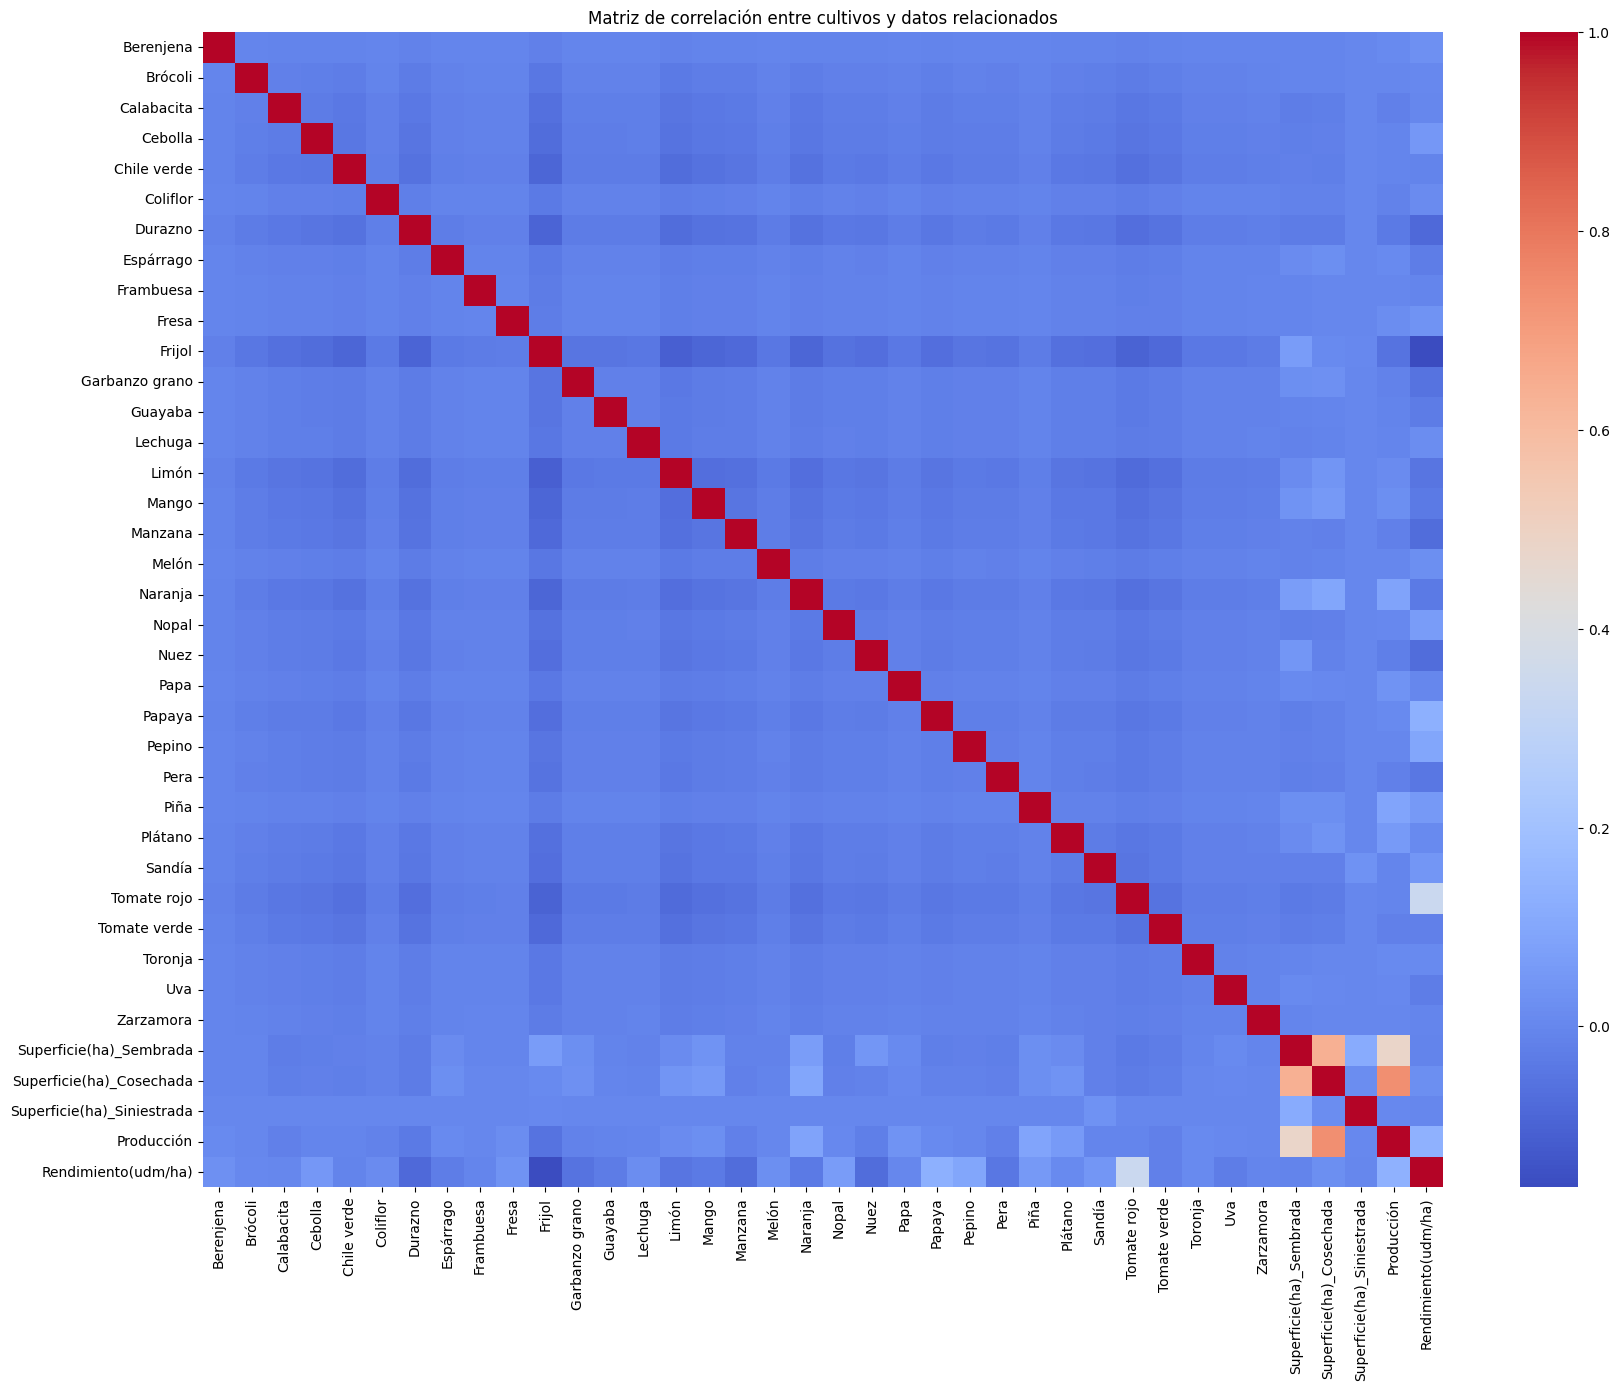

In [35]:
# Seleccionar las columnas relevantes
columnas_cultivo = ['Berenjena', 'Brócoli', 'Calabacita', 'Cebolla',
                   'Chile verde', 'Coliflor', 'Durazno', 'Espárrago', 'Frambuesa', 'Fresa',
                   'Frijol', 'Garbanzo grano', 'Guayaba', 'Lechuga', 'Limón', 'Mango',
                   'Manzana', 'Melón', 'Naranja', 'Nopal', 'Nuez', 'Papa', 'Papaya',
                   'Pepino', 'Pera', 'Piña', 'Plátano', 'Sandía', 'Tomate rojo',
                   'Tomate verde', 'Toronja', 'Uva', 'Zarzamora']

columnas_relacionadas = ['Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
                         'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)']

# Crear un nuevo DataFrame con estas columnas
df_cultivos = df[columnas_cultivo + columnas_relacionadas]

# Calcular la matriz de correlación
correlation_matrix = df_cultivos.corr()

# Visualizar la matriz de correlación con un mapa de calor de Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre cultivos y datos relacionados')
plt.show()


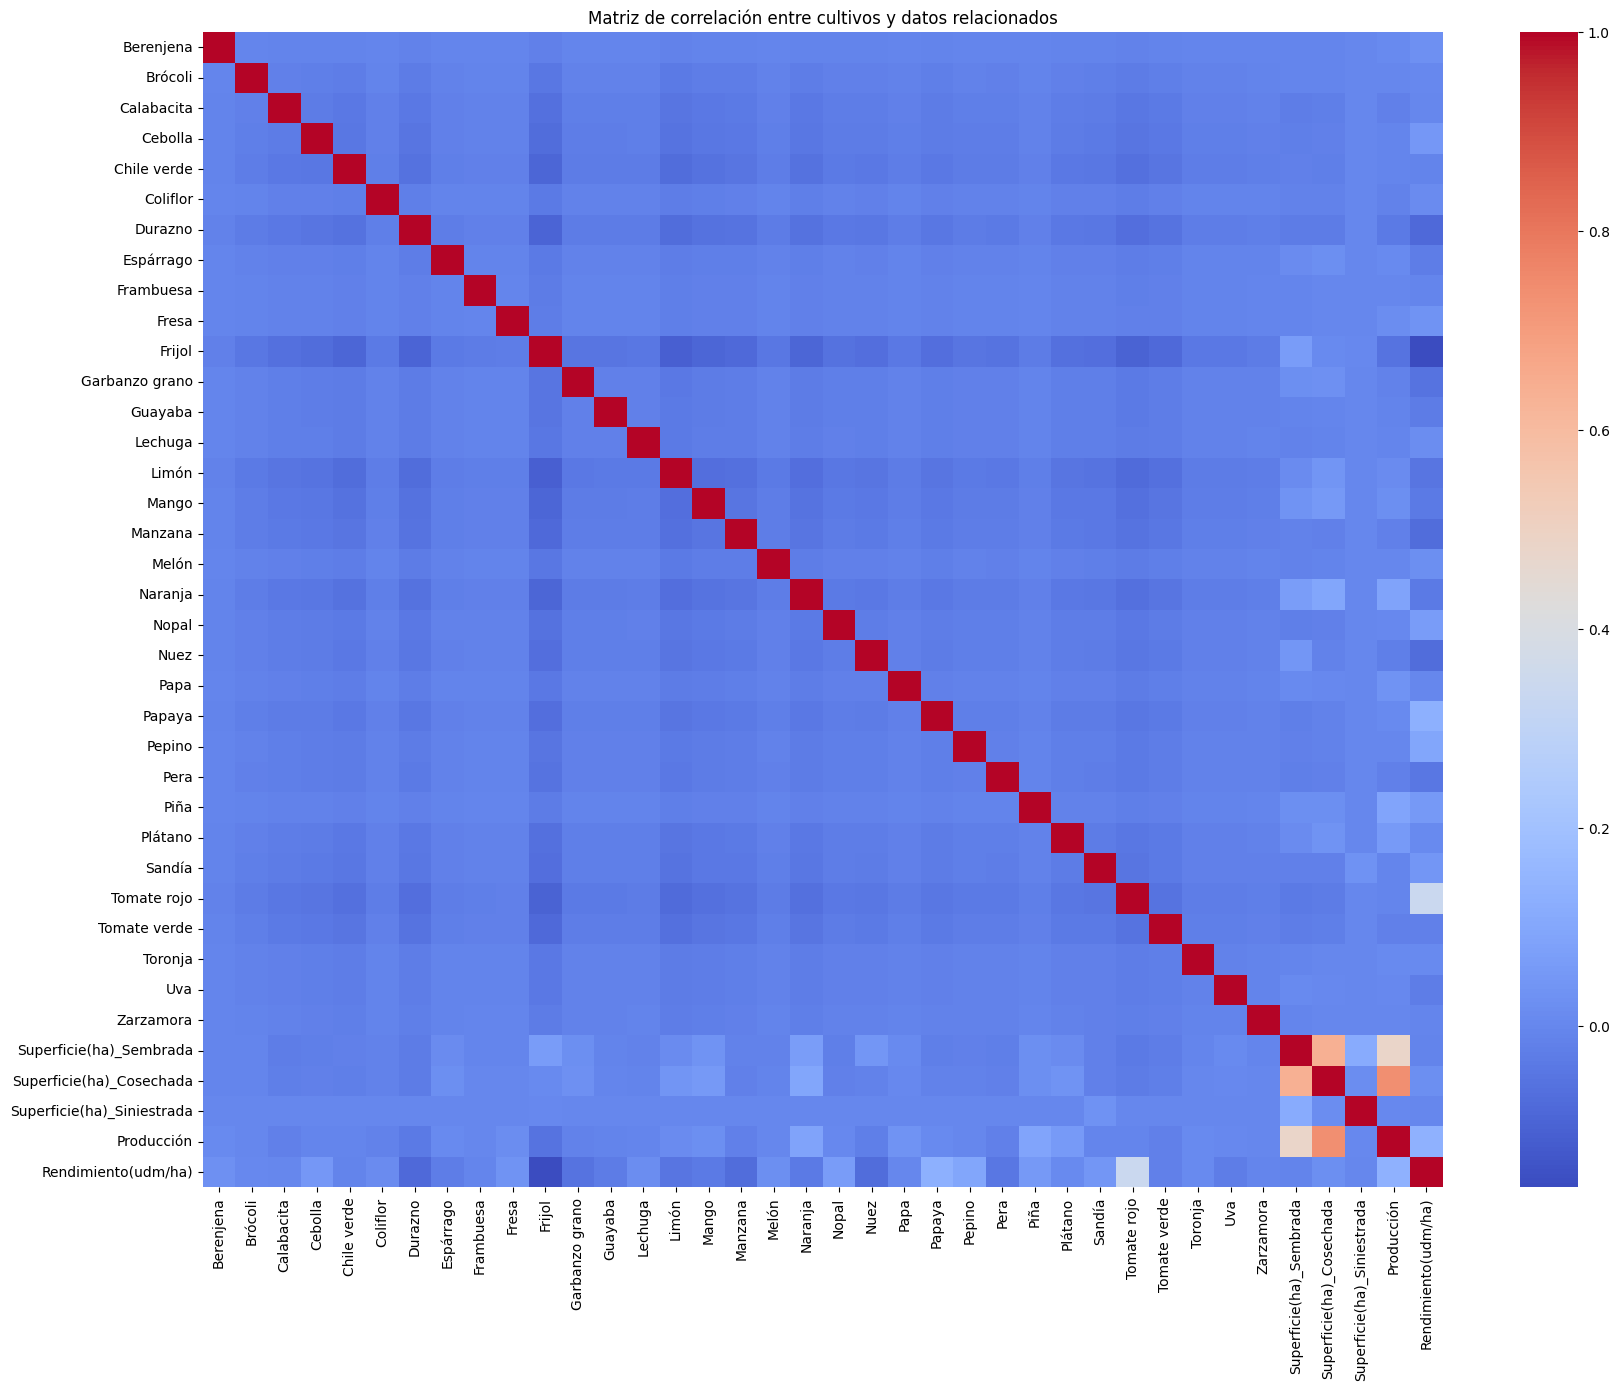

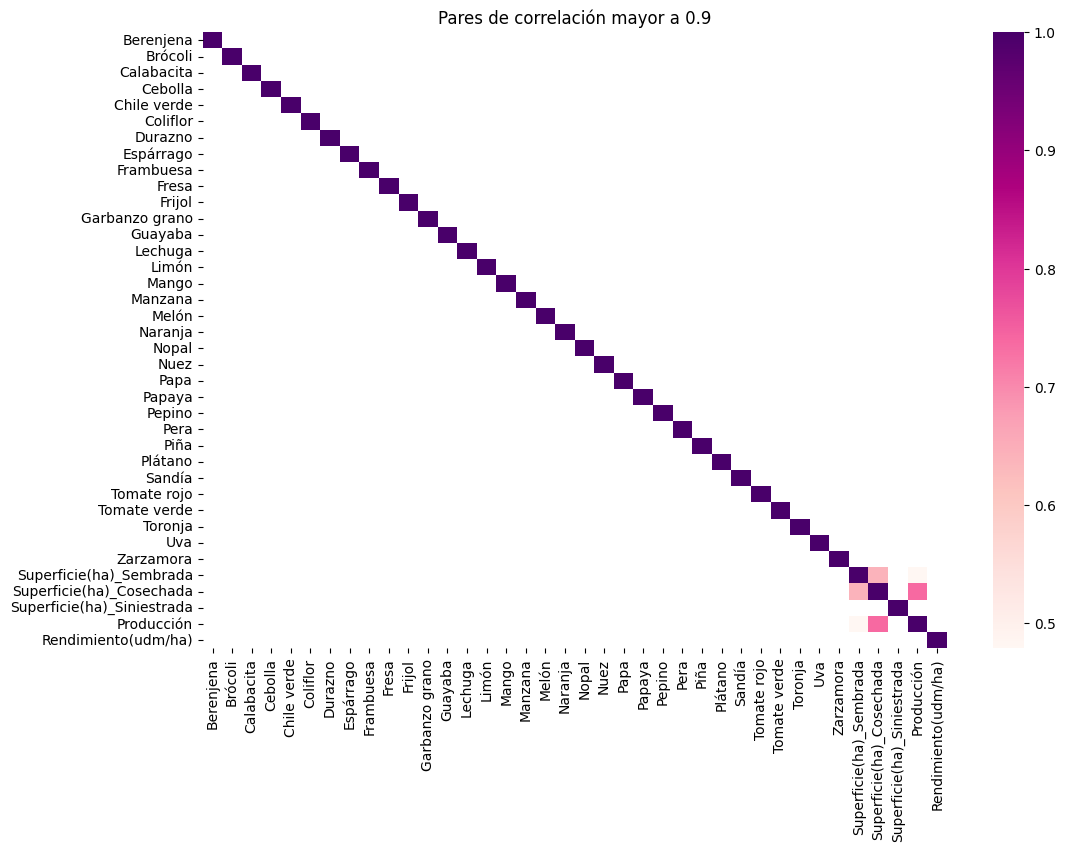

In [36]:
# Seleccionar las columnas relevantes
columnas_cultivo = ['Berenjena', 'Brócoli', 'Calabacita', 'Cebolla',
                   'Chile verde', 'Coliflor', 'Durazno', 'Espárrago', 'Frambuesa', 'Fresa',
                   'Frijol', 'Garbanzo grano', 'Guayaba', 'Lechuga', 'Limón', 'Mango',
                   'Manzana', 'Melón', 'Naranja', 'Nopal', 'Nuez', 'Papa', 'Papaya',
                   'Pepino', 'Pera', 'Piña', 'Plátano', 'Sandía', 'Tomate rojo',
                   'Tomate verde', 'Toronja', 'Uva', 'Zarzamora']

columnas_relacionadas = ['Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
                         'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)']

# Crear un nuevo DataFrame con estas columnas
df_cultivos = df[columnas_cultivo + columnas_relacionadas]

# Calcular la matriz de correlación
correlation_matrix = df_cultivos.corr()

# Visualizar la matriz de correlación con un mapa de calor de Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre cultivos y datos relacionados')
plt.show()

# Filtrar las correlaciones superiores a 0.4
corr = correlation_matrix
kot = corr[corr >= 0.40]  # Filtrar pares de correlación mayores a 0.4

plt.figure(figsize=(12, 8))
sns.heatmap(kot, cmap="RdPu")
plt.title('Pares de correlación mayor a 0.9')
plt.show()


# EDA 2.0

Se inicia con un nuevo EDA

In [39]:
eda.columns

Index(['Año', 'Mes', 'Cultivo', 'Estado', 'Distrito', 'Municipio',
       'Superficie(ha)_Sembrada', 'Superficie(ha)_Cosechada',
       'Superficie(ha)_Siniestrada', 'Producción', 'Rendimiento(udm/ha)',
       'Ivf', 'Precipitacion'],
      dtype='object')

In [40]:
eda.describe()

,Año,Mes,Superficie(ha)_Sembrada,Superficie(ha)_Cosechada,Superficie(ha)_Siniestrada,Producción,Rendimiento(udm/ha),Precipitacion
count,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000,266315.000000
mean,2021.030092,6.373929,282.333975,149.702932,1.341980,1978.033957,9.988692,98.491824
std,0.810992,3.185770,1570.268266,928.689893,157.263057,12720.445636,22.526595,103.711652
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.100000
50%,2021.000000,6.000000,23.000000,3.000000,0.000000,17.670000,1.750000,57.500000
75%,2022.000000,9.000000,96.000000,32.000000,0.000000,307.200000,12.420000,167.400000
max,2022.000000,12.000000,120900.000000,43772.000000,28372.000000,722238.000000,587.060000,705.100000


In [45]:
# Crear una matriz de correlación
correlation_matrix = eda.corr()

# Crear el heatmap con Plotly
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='OrRd'))

fig.update_layout(title='Matriz de Correlación',
                  width=800, height=800)

fig.show()


C:\Users\him_6\AppData\Local\Temp\ipykernel_25548\2914936320.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [49]:
# Crear una matriz de correlación
correlation_matrix = eda.corr()

# Crear el heatmap con etiquetas en cada recuadro
fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='OrRd'))

fig.update_layout(title='Matriz de Correlación',
                  width=800, height=800)

# Añadir etiquetas en cada recuadro
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(
            dict(text=str(round(value, 2)),
                 x=correlation_matrix.columns[j],
                 y=correlation_matrix.columns[i],
                 xref='x',
                 yref='y',
                 showarrow=False)
        )

fig.update_layout(annotations=annotations)

fig.show()



C:\Users\him_6\AppData\Local\Temp\ipykernel_25548\996208545.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [54]:
eda.to_parquet('csv\eda.parquet.gzip', compression='gzip')

In [50]:
eda.to_csv('csv\eda.csv', index=False)